In [413]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Reading data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_original = train_data.copy()
test_original = test_data.copy()

#print data types of each column
''' object means categorical'''
train_data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [414]:
train_data.shape


(614, 13)

In [415]:
test_data.shape

(367, 12)

In [416]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [417]:
# Normalize can be set to True to print proportions instead of number
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

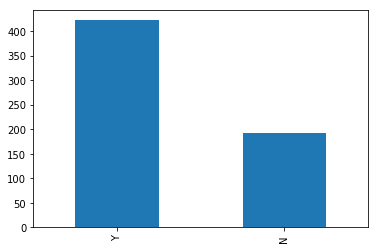

In [418]:
train_data['Loan_Status'].value_counts().plot.bar()

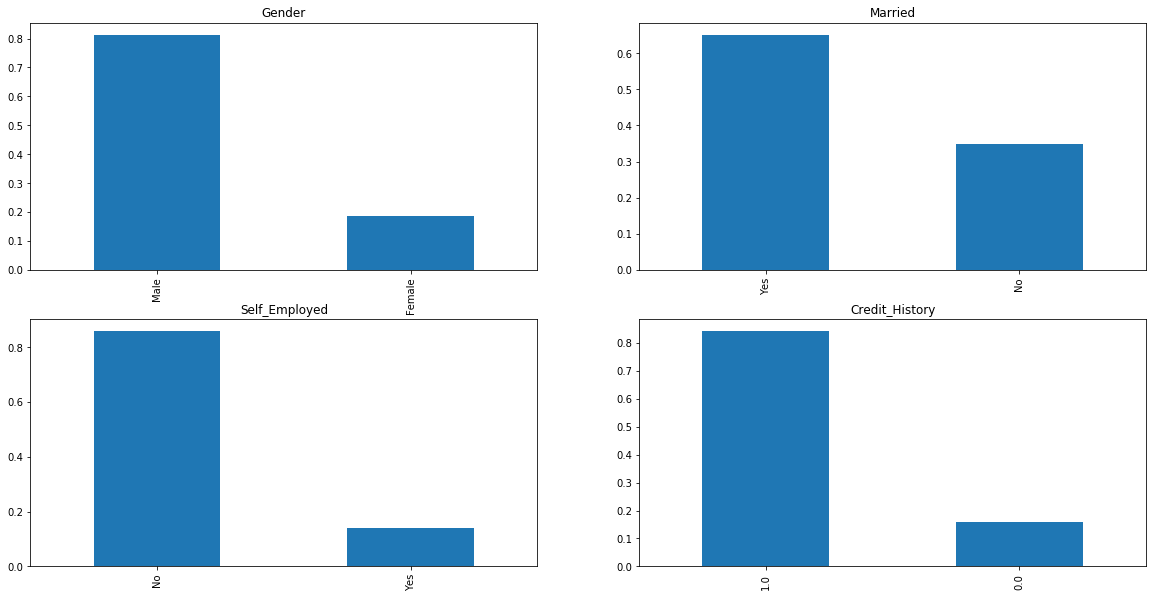

In [419]:
plt.figure(1) 
plt.subplot(221)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
train_data['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

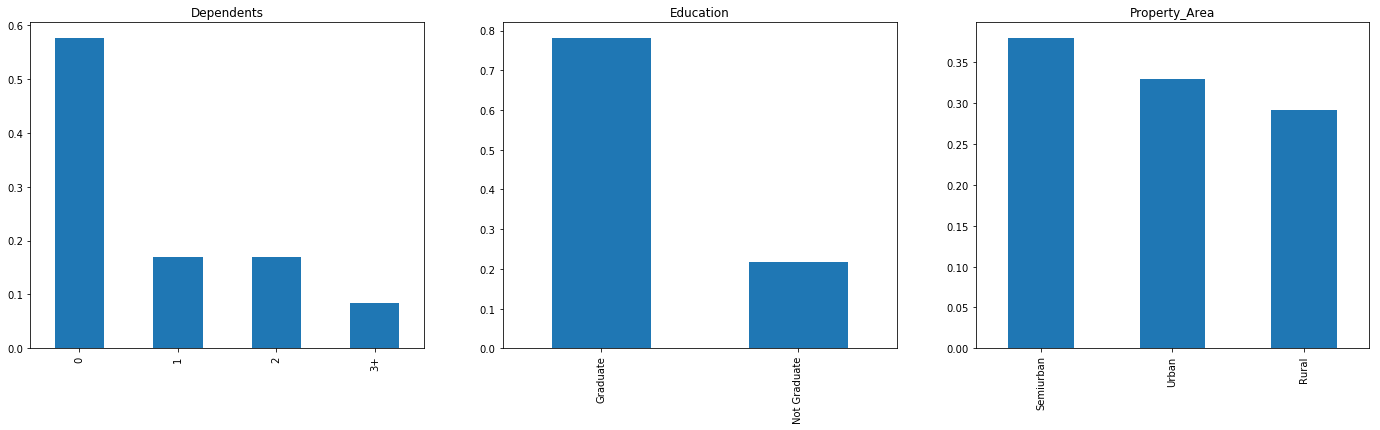

In [420]:
plt.figure(1)
plt.subplot(131) 
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
train_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

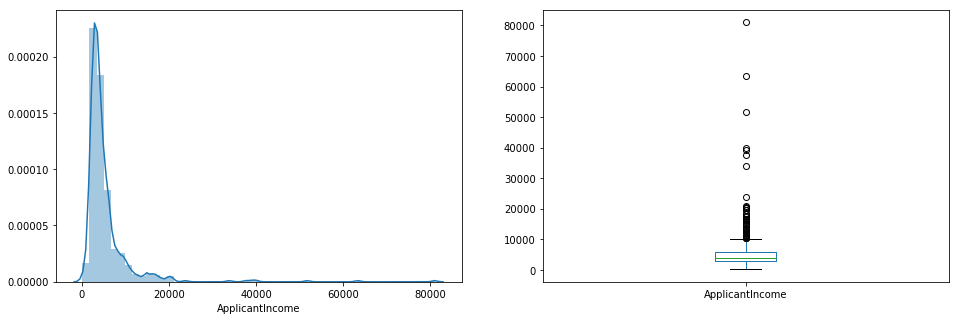

In [421]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome'])
plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

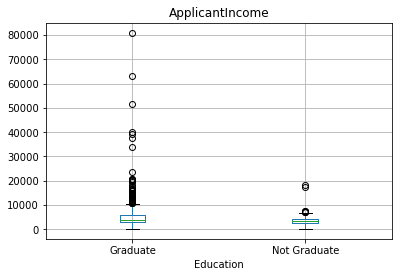

In [422]:
train_data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")


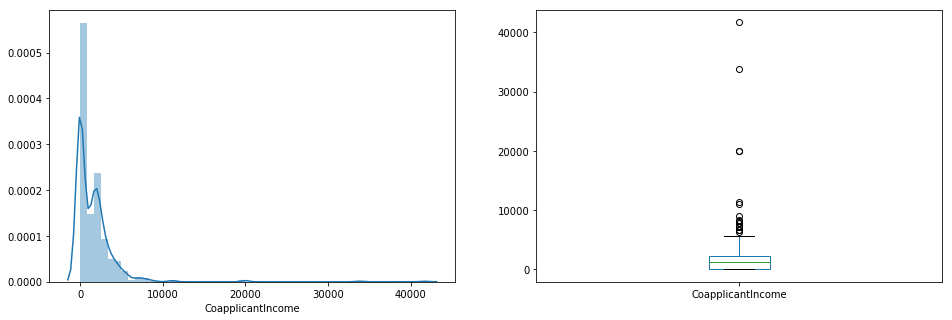

In [423]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome']); 
plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

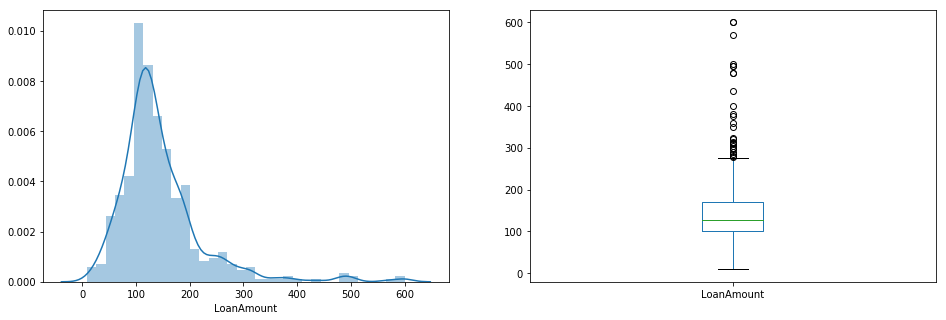

In [424]:
plt.figure(1) 
plt.subplot(121) 
df=train_data.dropna()
sns.distplot(df['LoanAmount']); 
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

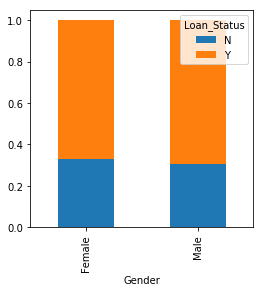

In [425]:
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

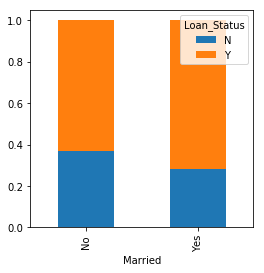

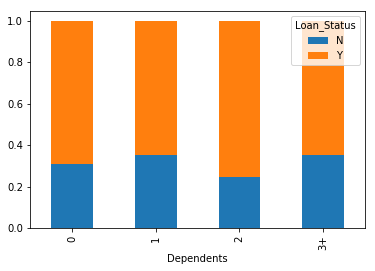

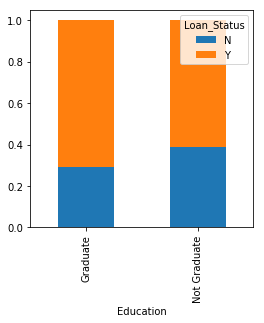

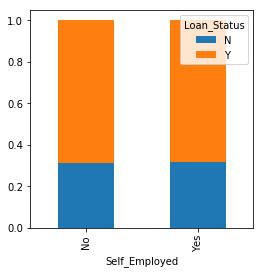

In [426]:
Married=pd.crosstab(train_data['Married'],train_data['Loan_Status']) 
Dependents=pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Education=pd.crosstab(train_data['Education'],train_data['Loan_Status']) 
Self_Employed=pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

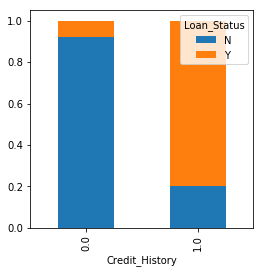

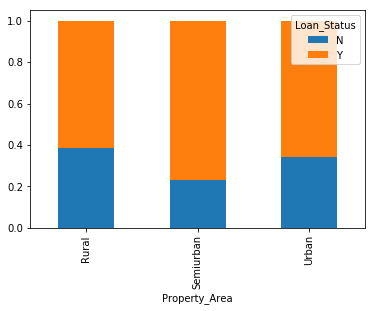

In [427]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status']) 
Property_Area=pd.crosstab(train_data['Property_Area'],train_data['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

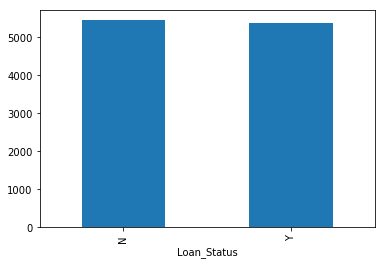

In [428]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

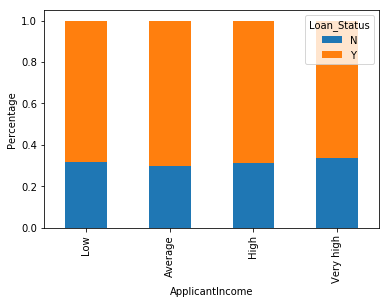

In [429]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train_data['Income_bin']=pd.cut(train_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

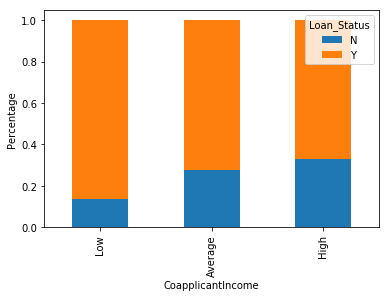

In [430]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train_data['Coapplicant_Income_bin']=pd.cut(train_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

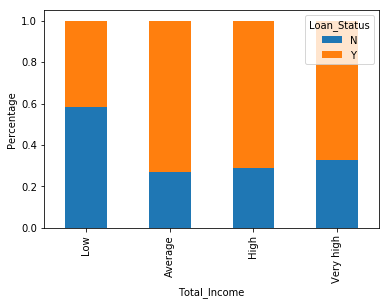

In [431]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_data['Total_Income_bin'],train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

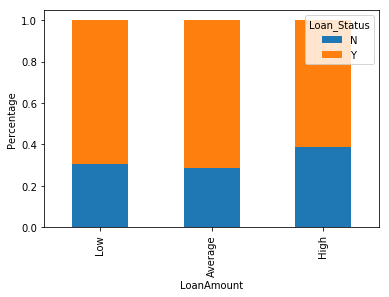

In [432]:
''' Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.
We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 
One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.'''

bins=[0,100,200,700] 
group=['Low','Average','High'] 
train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [433]:
train_data=train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train_data['Dependents'].replace('3+', 3,inplace=True) 
test_data['Dependents'].replace('3+', 3,inplace=True) 
train_data['Loan_Status'].replace('N', 0,inplace=True) 
train_data['Loan_Status'].replace('Y', 1,inplace=True)

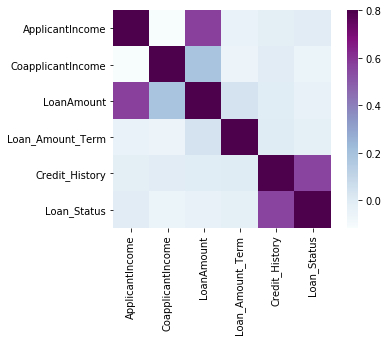

In [434]:
''' Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring.
The variables with darker color means their correlation is more.'''

sns.heatmap(train_data.corr(), vmax=.8, square=True, cmap="BuPu");

In [435]:
''' We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.'''

' We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.'

In [436]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [437]:
''' For numerical variables: imputation using mean or median
For categorical variables: imputation using mode'''

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True) 
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [438]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [439]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [440]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [441]:
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True) 
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True) 
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True) 
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True) 
test_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

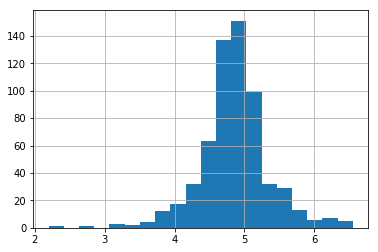

In [442]:
''' Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer.
This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, 
it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.'''

train_data['LoanAmount_log'] = np.log(train_data['LoanAmount']) 
train_data['LoanAmount_log'].hist(bins=20) 
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])


In [443]:
train_data=train_data.drop('Loan_ID',axis=1) 
test_data=test_data.drop('Loan_ID',axis=1)

In [444]:
X = train_data.drop('Loan_Status',1) 
y = train_data.Loan_Status

In [445]:
X=pd.get_dummies(X) 
train_data=pd.get_dummies(train_data) 
test_data=pd.get_dummies(test_data)

In [446]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [447]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

pred_cv = model.predict(x_test)

In [448]:
accuracy_score(y_test,pred_cv)

0.827027027027027

In [449]:
pred_test = model.predict(test_data)

submission=pd.read_csv("sample_submission.csv")

submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [450]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score)
    i+=1 
    pred_test = model.predict(test_data)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


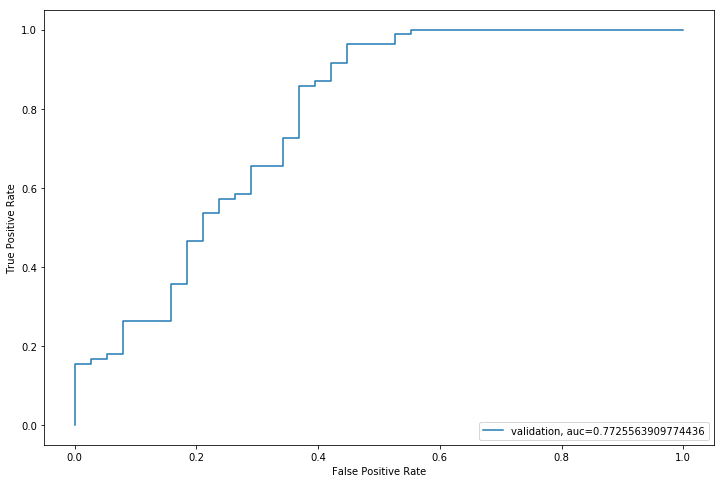

In [451]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()

In [452]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [453]:
''' Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.'''

' Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.\nEMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.\nBalance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.'

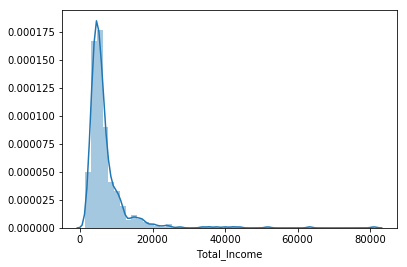

In [454]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome'] 
test_data['Total_Income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']
sns.distplot(train_data['Total_Income']);

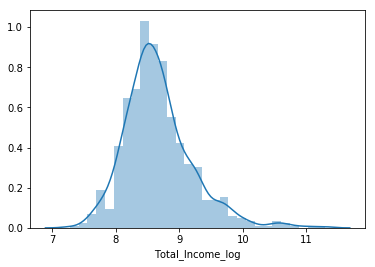

In [455]:
train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data['Total_Income_log']); 
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

In [456]:
train_data['EMI']=train_data['LoanAmount']/train_data['Loan_Amount_Term']
test_data['EMI']=test_data['LoanAmount']/test_data['Loan_Amount_Term']


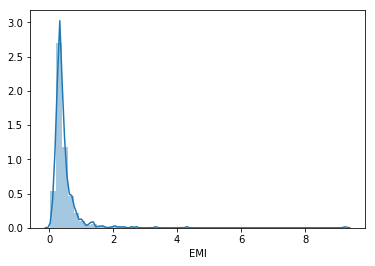

In [457]:
sns.distplot(train_data['EMI']);

In [458]:
train_data['Balance Income']=train_data['Total_Income']-(train_data['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)


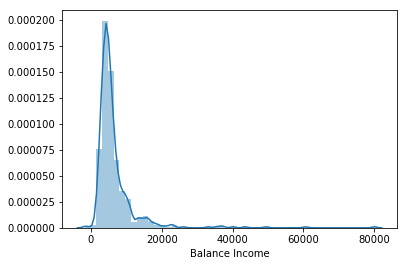

In [459]:
sns.distplot(train_data['Balance Income']);

In [460]:
train_data=train_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test_data=test_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)